---
---
# Introduction

---
## Iris flower dataset

In this lab we will explore a sample dataset, and will then use it to build and train a classifier model based on a multi-layer neural network — right on your device!

We will use **Iris flower data set**, which consists of 50 samples from each of three species of Iris (<i>Iris setosa</i>, <i>Iris virginica</i> and <i>Iris versicolor</i>). The dataset we will use contains four features measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, we will develop a classifier to distinguish the species from each other. This is what they look like in real life: 

<div>
    <div style="float:left;margin-right:15px;">
        <img src="Assets/Iris_setosa.jpg" alt="Iris setosa" height="185" width="185" style="border-radius: 10px;"/>
        <p style="text-align:center;font-size:0.85rem;">Iris setosa</p>
    </div>
    <div style="float:left;margin-right:15px;">
        <img src="Assets/Iris_versicolor.jpg" alt="Iris versicolor" height="185" width="185" style="border-radius: 10px;"/>
        <p style="text-align:center;font-size:0.85rem;">Iris versicolor</p>
    </div>
    <div style="float:left;">
        <img src="Assets/Iris_virginica.jpg" alt="Iris virginica" height="185" width="185" style="border-radius: 10px;"/>
        <p style="text-align:center;font-size:0.85rem;">Iris virginica</p>
    </div>
</div>

In the next chapter we will learn how to read a dataset using Pandas, and how one could approach analyzing dataset features by plotting feature projections using Matplotlib.

In _Data preprocessing_ chapter we will see what steps need to be taken before we can use a dataset for training, such as feature scaling, encoding labels and splitting the dataset into training and test sets.

Finally, _Neural network classifier_ chapter will show how we build and train a classifier based on a neural network, how we evaluate the learning process and how to use the final model to check arbitrary sepals and petals measurements.

---
---
# Analyzing data

---
## Reading dataset

The dataset is stored in a CSV file, and we will use Pandas library to read and inspect it. Pandas has a dedicated method to load datasets from CSV, which creates a Pandas DataFrame object — a two-dimensional, size-mutable, potentially heterogeneous tabular data.

In [1]:
import pandas as pd
df = pd.read_csv("Data/iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id                   150 non-null int64
Sepal length (cm)    150 non-null float64
Sepal width (cm)     150 non-null float64
Petal length (cm)    150 non-null float64
Petal width (cm)     150 non-null float64
Species              150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


If you tap the _Run Code_ button, all code on this page will get executed, and execution output will appear below. When dataset finishes loading into a Pandas DataFrame, you should see a brief dataset description — looks like the dataset consists of 150 samples, and has 6 columns: sample identifier, 4 measured features and sample label, i.e. the Iris species this sample belongs to. 

We will prepare a couple of convenience arrays, which will come handy later on, on further lab pages:

In [2]:
# All unique Iris species from the data set
species = pd.unique(df['Species'].sort_values())
# Colors for identifying species on plots
colors = ['darkslateblue', 'turquoise', 'darkorange']
# List of measured features in the data set
features = ['Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)', 'Petal width (cm)']
# Number of samples for each species
counts = df['Species'].value_counts().sort_index()
print('Done!')

Done!


---
## Distribution across classes

Let's see how sample data is distributed across classes. In order to do that, we will use Matplotlib plotting library to generate a bar plot with a number of samples for each Iris species in the dataset.

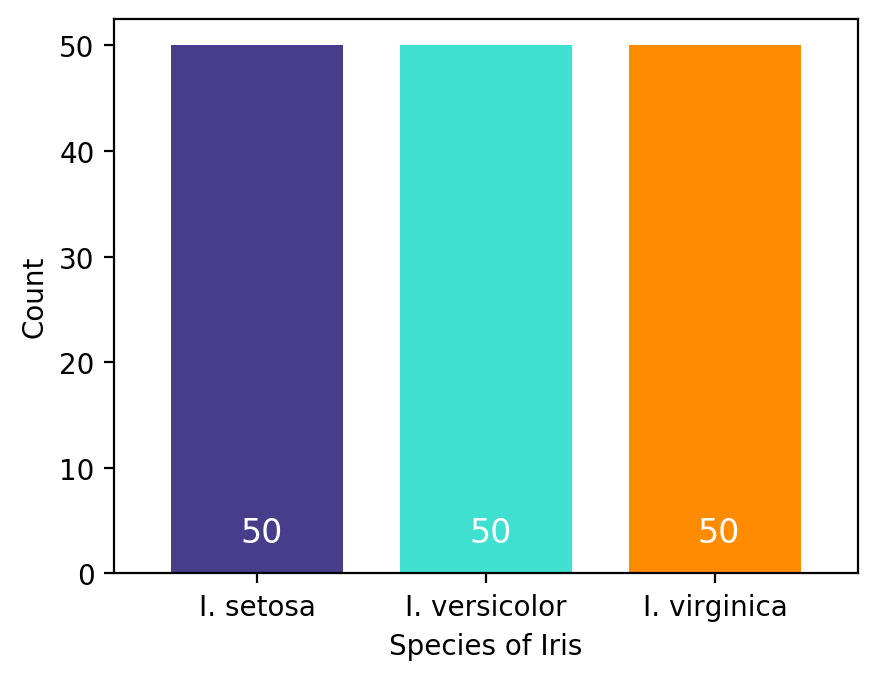

In [3]:
import matplotlib.pyplot as plt
# Display counts as bar plot
ax = counts.plot.bar(width=0.75, color=colors)
# Add counts as text over bars
for i, v in counts.reset_index().iterrows():
    ax.text(i - 0.075, 3.0, v.Species, color='white', size='large')
# Rotate X axis ticks
plt.xticks(rotation='horizontal')
# Add labels
plt.xlabel('Species of Iris')
plt.ylabel('Count')
plt.show()

If you run code on this page, you should see a bar plot above — with all bars aligned. This is great, as the dataset seems well-balanced — this means that we have the same number of samples for each class that we will be training our model to predict. 

If it wasn't (for example, if one of iris species had significantly more samples in the dataset than the others), we would need to do some extra work during pre-processing stage to make sure each class is equally represented: a classifier trained on imbalanced data can get biased, favoring the class with the largest proportion of samples, which may lead to misleading accuracies. But looks like we're good here!

In [4]:
del ax

---
## 2D feature projections

Let's try to investigate if the features reported in the dataset will be helpful in separating samples into classes. We will start with a combination of 2D-projection scatter plots: there are 4 features in the dataset, which translates to 6 unique pairs of features to be used for 2D plot axes. You can think of each plot as a 2D projection of the "full" 4D feature space, which only takes 2 out of 4 available features into consideration.

Just as with the bar plot, we will use Matplotlib to generate those scatter plots.

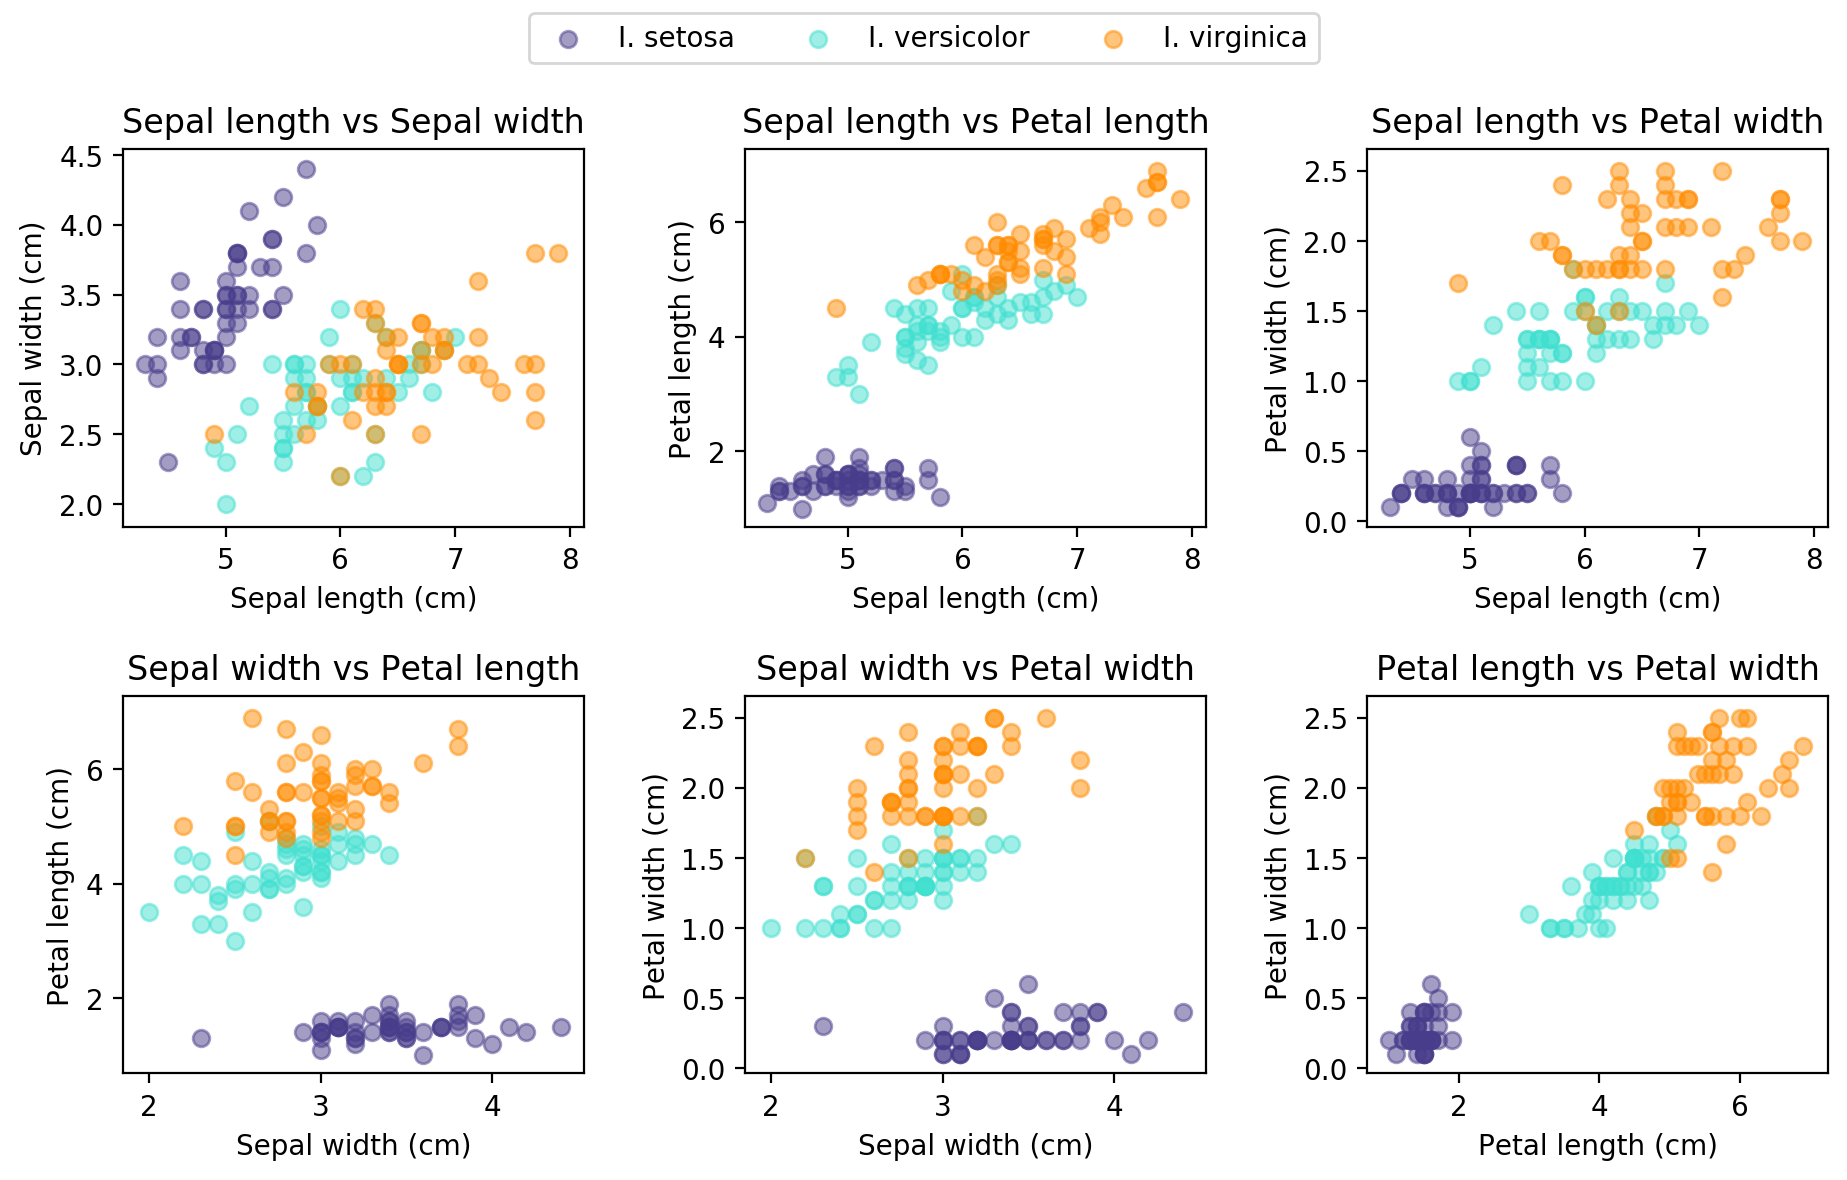

In [5]:
import numpy as np
import itertools
# Construct a list of 6 possible pairs of features
feature_2s = np.array(list(itertools.combinations(features, 2)))
# Plot each 2D projection
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(11, 6))
plt.subplots_adjust(hspace=0.45, wspace=0.35)
for ax, feature1, feature2 in zip(axs.reshape(-1), feature_2s[:, 0], feature_2s[:, 1]):
    for name, color in zip(species, colors):    
        df_spec = df[df['Species'] == name]    
        ax.scatter(df_spec[feature1], df_spec[feature2], color=color, alpha=0.5, label=name)
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_title((feature1 + ' vs ' + feature2).replace(' (cm)',''))
# Add legend
handles, labels = axs[1, 2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
plt.show()

If you run code on this page, you should see six plots, one for each possible feature combination. Data samples seem to form fairly distinguishable blobs, and in some cases could even be linearly separable — great! It may be a bit more challenging to tell <i>Iris versicolor</i> from <i>Iris virginica</i> though. 

In [6]:
fig.clear()
del axs
del fig

---
## 3D feature projections

Let's take it one step further and try 3D-projection scatter plots: the idea is the same as before, but instead of 2D plots we will be plotting in 3D space. This reduces the number of combination of features to 4 (as we are now combining into triplets rather than pairs), therefore we will plot 4 figures.

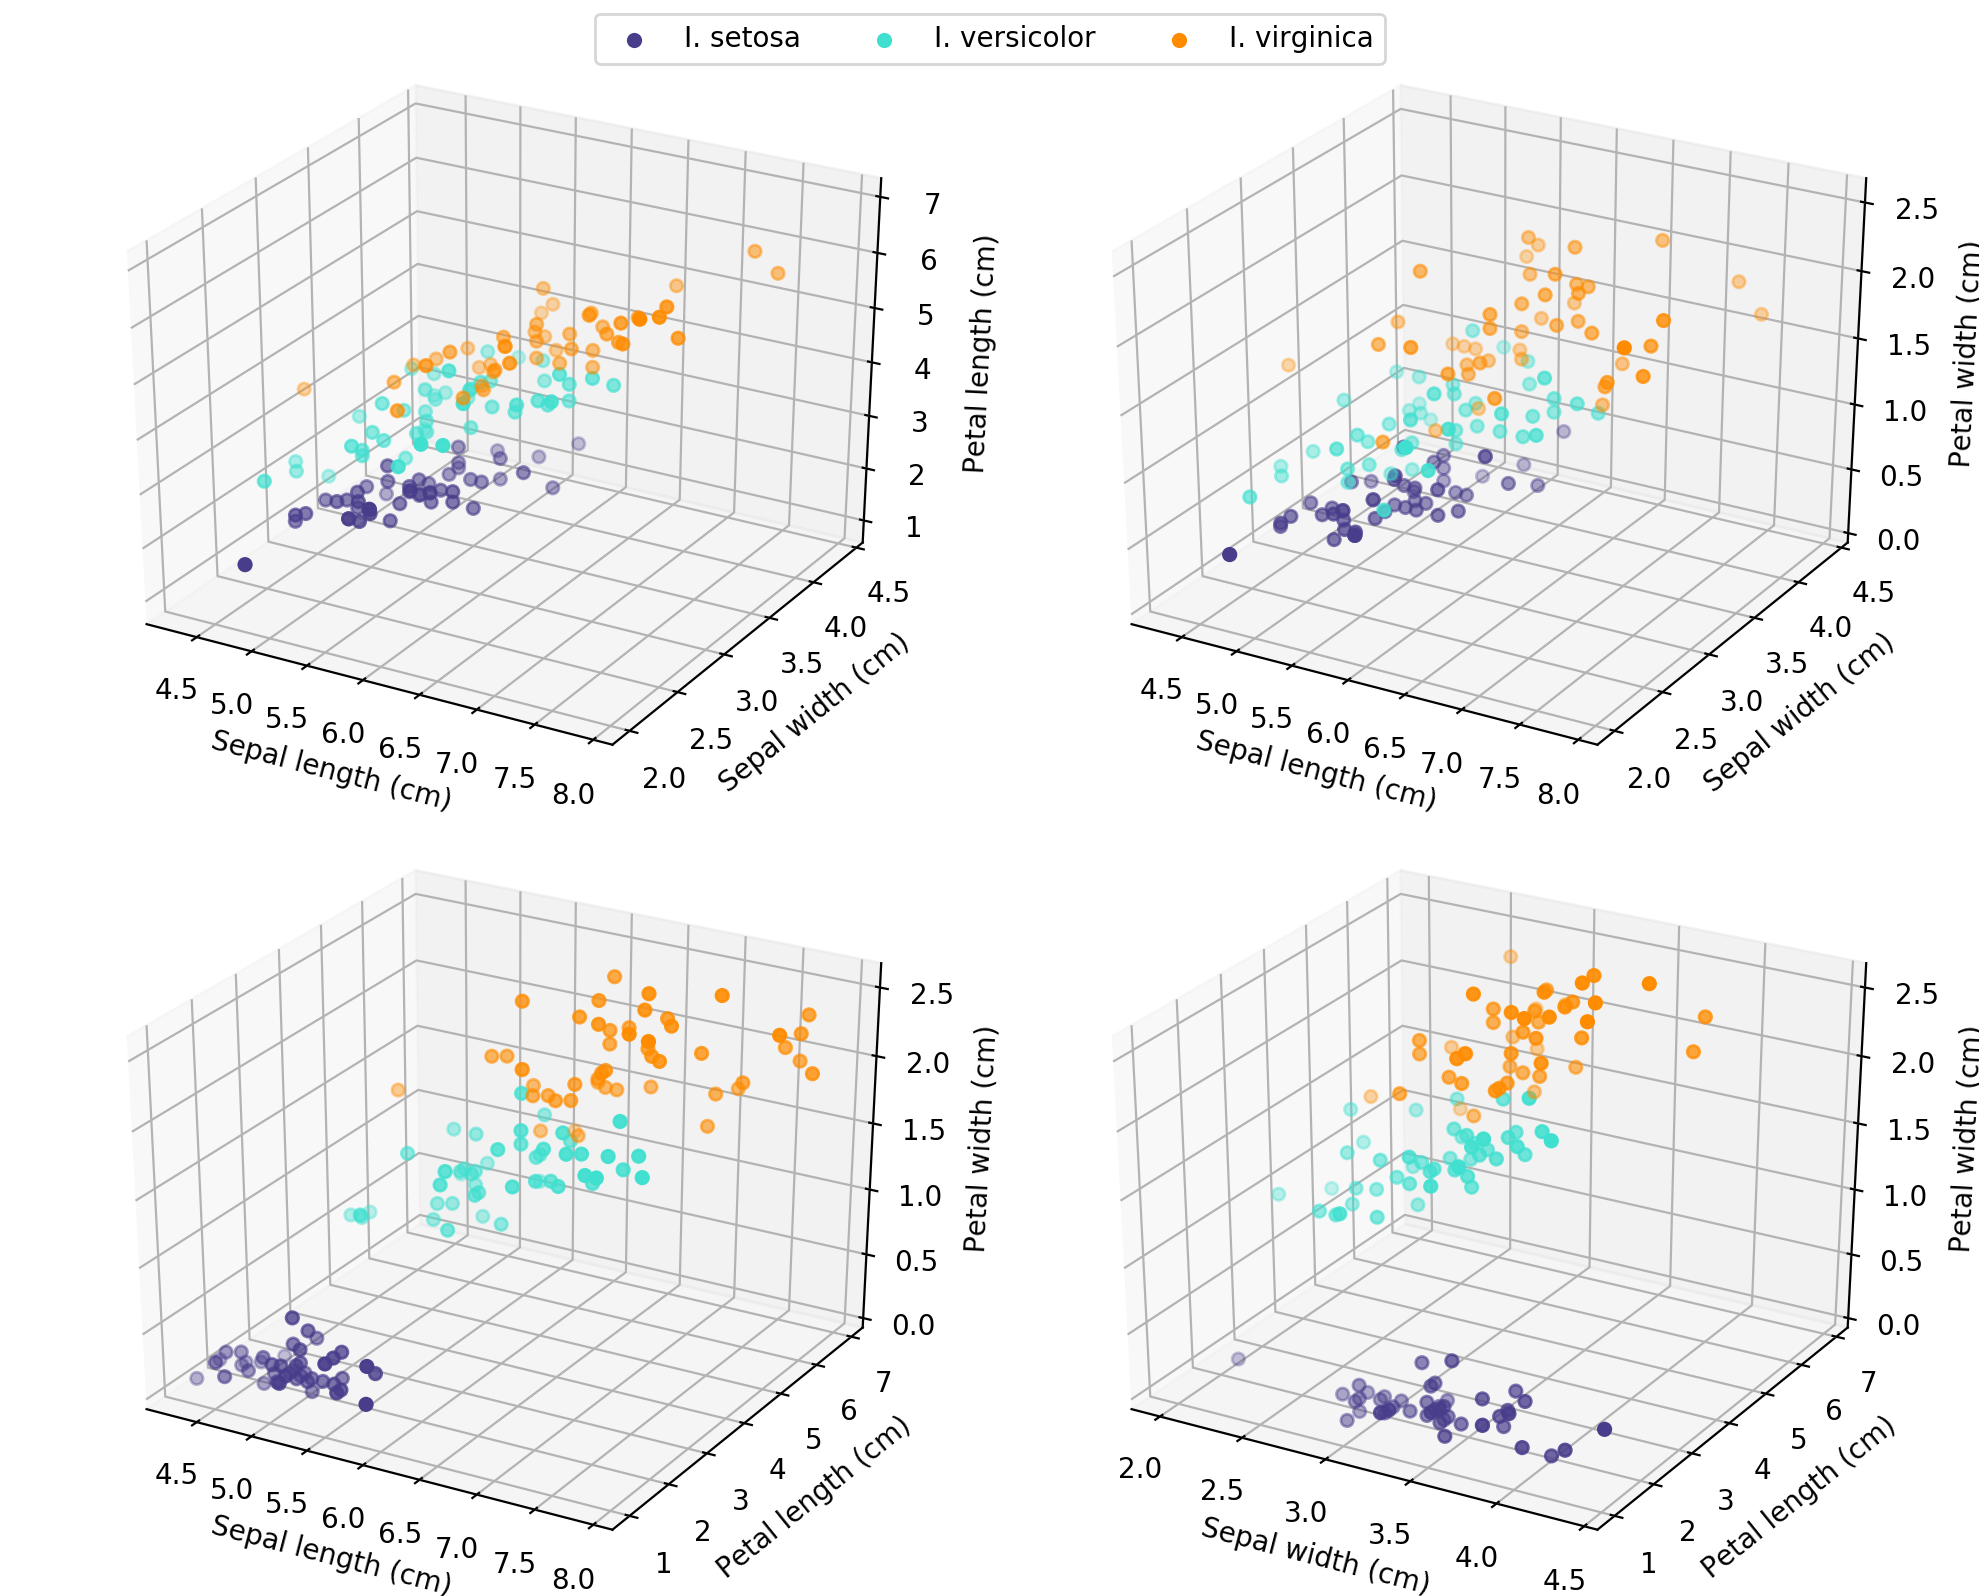

In [7]:
import itertools
from mpl_toolkits.mplot3d import Axes3D
# Construct a list of 4 possible triplets of features
feature_3s = np.array(list(itertools.combinations(features, 3)))
fig = plt.figure(figsize=(10, 8))
# Plot each 3D projection
for i in range(4):
    feature1 = feature_3s[i, 0]
    feature2 = feature_3s[i, 1]
    feature3 = feature_3s[i, 2]
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    for name, color in zip(species, colors):    
        df_spec = df[df['Species'] == name]    
        ax.scatter(df_spec[feature1], df_spec[feature2], df_spec[feature3], color=color, label=name)
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(feature3)
# Add legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
plt.tight_layout()
plt.show()

Once again, run code on this page, and you will see four separate 3D plots — looks like some features may be more helpful than the others, but in general there is no need for any advanced feature engineering techniques. We should be able to build a decent classifier by simply using all 4 features from the dataset.

In [8]:
fig.clear()
del fig

---
---
# Data preprocessing

---
## Feature scaling

Although we will use all 4 features from the dataset, we do need to prepare the data first. Data preprocessing is a very important step of preparing (cleaning and organizing) raw collected data; its main objective is to make it easier for our classifier to extract meaningful insights from data during training. Let's take a look at the existing features first:

In [9]:
# Set float number formatting option for Pandas
pd.set_option('display.float_format', '{:.3f}'.format)
df[features].describe()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm)
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


If you run code on this page, you will see dataset description above — showing that all features in our dataset are continuous numeric values representing same measurement units, so we should be able to use them as is. The only thing worth doing is scaling, i.e. making sure all features have the properties of a standard normal distribution with a mean close to `0` and a standard deviation close to `1`. We will use Scikit-learn's standard feature scaler `sklearn.preprocessing.StandardScaler` to take care of that. 

In [10]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X = feature_scaler.fit_transform(df[features])
pd.DataFrame(data=X, columns=features).describe()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm)
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,0.000,0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.439,-1.569,-1.444
25%,-0.901,-0.588,-1.228,-1.182
50%,-0.053,-0.125,0.336,0.133
75%,0.675,0.569,0.763,0.791
max,2.492,3.115,1.786,1.711


Looks much better! Intuitively, you can think of it like this: training a model usually involves minimizing a loss function — and loss function value depends on the raw input the model receives. Assuming you don't want a particular feature to contribute more to the loss value than the others, you would expect all features to stay within similar bounds. Otherwise, your model could make a false assumption that some features are more important than others, damaging the accuracy.

---
## Encode labels and prepare a test set

We also need to prepare labels, i.e. our target values — we will encode them using Scikit-learn's `sklearn.preprocessing.LabelEncoder` encoder, which will simply translate strings with names of Iris species to numeric values.

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Species'])

Now `X` variable contains preprocessed features from our original dataset, and `y` contains corresponding labels. 

Finally, we will split our dataset into training and test sets. Training set will be used to train the classifier, and test set will let us evaluate model's accuracy after training is completed. We will collect model's predictions for samples from the test set (which classifier hasn't seen during training), and check how many of its predictions match the actual values.

In [12]:
from sklearn.model_selection import train_test_split

# Allocate 30% of original dataset to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Done!')

Done!


---
---
# Neural network classifier

---
## Architecture and training

We will build a relatively simple classifier based on a neural network with two hidden layers using `sklearn.neural_network.MLPClassifier` (MLP standing for [multi-layer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron)). First hidden layer will have 5 neurons, and second hidden layer will have 3 neurons, each followed by a [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Model architecture will look like this:

<br>
<div align="center">
    <img src="Assets/nn_light.png" class="juno_ui_theme_light" style="display: inline-block;" alt="MLP classifier architecture" width="600"><img src="Assets/nn_dark.png" class="juno_ui_theme_dark" style="display: none; margin: 0px;" alt="MLP classifier architecture" width="600">
</div>

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
# Use stochastic gradient descent as optimization method
model = MLPClassifier(solver='sgd', max_iter=500, learning_rate_init=0.1, hidden_layer_sizes=(5, 3), random_state=42)
print('Training classifier on', y_train.size, 'examples...')
model.fit(X_train, y_train)
print('Training completed after', model.n_iter_, 'iterations with loss:', model.loss_)
print('Test set accuracy:', metrics.accuracy_score(model.predict(X_test), y_test))

Training classifier on 105 examples...
Training completed after 265 iterations with loss: 0.0763460100050261
Test set accuracy: 1.0


If you run code on this page, this will kick off the neural network training process — and you will see the training results above. Although exact loss value may be slightly different (due to network weights getting different initial random values on your device), you should still get accuracy close to `1.0` (i.e. 100%) on the test set. Although it may seem unbelievably high, it shouldn't come as a surprise: Iris dataset is relatively small, and has fairly easily separable classes.

---
## Evaluate learning process

Now, let's check the learning curves to see how the training process went. It would be great to plot training loss against validation loss, but due to very limited size of the original data we didn't allocate any examples as a validation set. Let's check training loss:

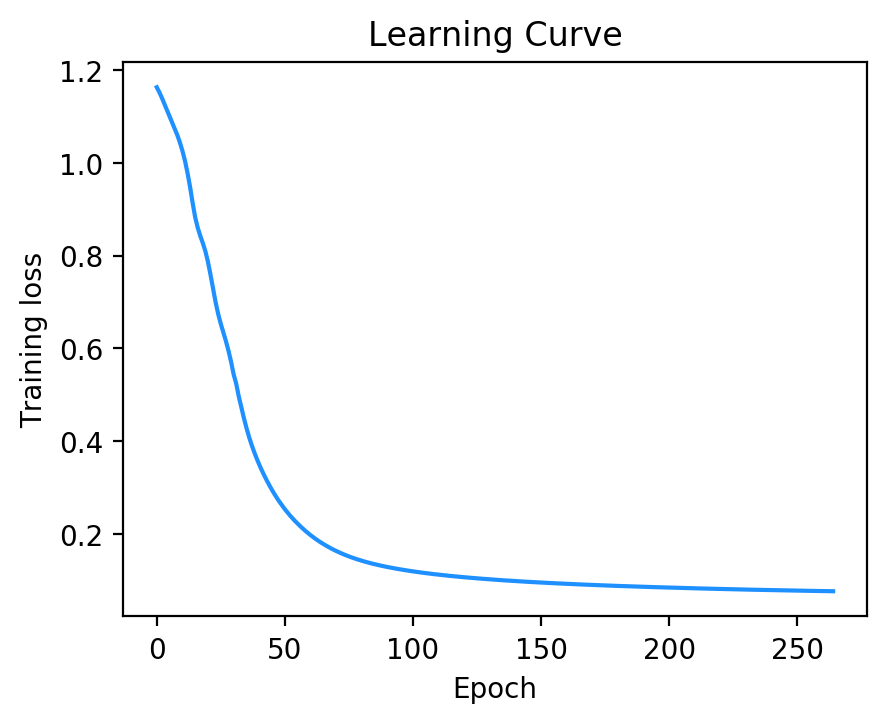

In [14]:
plt.plot(model.loss_curve_, color='dodgerblue')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.title('Learning Curve')
plt.show()

Looks like training went fairly smooth — and loss could likely improve even further if we let it train longer. Although most likely the model would simply end up overfitting the training data, something that would be hard to identify and address without a validation set.

In [15]:
plt.clf()

<Figure size 480x360 with 0 Axes>

---
## Check model predictions

Finally, we can now use this classifier for arbitrary measurements! Let's prepare a set of variables for a new observed flower — or, if you have an iris flower at hand, feel free to use your own real-world measurements here:

In [ ]:
sepal_length_cm = 5.5
sepal_width_cm = 2.9
petal_length_cm = 4.0
petal_width_cm = 1.4

A very important point here is to make sure that the values you feed into your classifier now go through the same preprocessing steps that original dataset went through _while training_ — using the same scaler object. 

In [16]:
prediction = model.predict(feature_scaler.transform([[sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm]]))
predicted_name = label_encoder.inverse_transform(prediction)[0]

Now that we have our prediction, print it below and display an image of the predicted Iris species flower:

This appears to be a I. versicolor


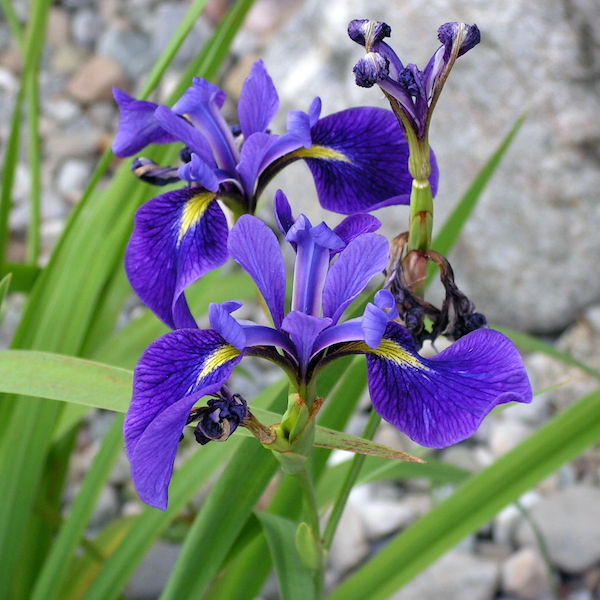

In [16]:
from IPython.display import Image, display
print('This appears to be a', predicted_name)
images_map = {
    'I. setosa': 'Data/Iris_setosa.jpg', 
    'I. versicolor': 'Data/Iris_versicolor.jpg', 
    'I. virginica': 'Data/Iris_virginica.jpg'
}
display(Image(filename=images_map[predicted_name], width=185, height=185))

Now, try changing the hardcoded values for `sepal_length_cm`, `sepal_width_cm`, and other features — and see how predictions of our classifier change!

---
---
# Appendix

---
## References

## Dataset

Iris Dataset by R. A. Fisher (1936), _"The use of multiple measurements in taxonomic problems"_, [Annals of Eugenics. 7 (2): 179–188.](https://doi.org/10.1111/j.1469-1809.1936.tb02137.x)

## Images

* _Kosaciec szczecinkowaty Iris setosa.jpg_ by [Radomil](https://commons.wikimedia.org/wiki/User:Radomil) under [CC Attribution-Share Alike 3.0 Unported](https://creativecommons.org/licenses/by-sa/3.0/deed.en) license: https://en.wikipedia.org/wiki/File:Kosaciec_szczecinkowaty_Iris_setosa.jpg

* _Blue Flag, Ottawa.jpg_ by [D. Gordon E. Robertson](https://commons.wikimedia.org/wiki/User:Dger) under [CC Attribution-Share Alike 3.0 Unported](https://creativecommons.org/licenses/by-sa/3.0/deed.en) license: https://commons.wikimedia.org/wiki/File:Blue_Flag,_Ottawa.jpg

* _Iris virginica 2.jpg_ by [Eric Hunt](https://commons.wikimedia.org/wiki/User:Eric_in_SF) under [CC Attribution-Share Alike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license: https://commons.wikimedia.org/wiki/File:Iris_virginica_2.jpg